In [10]:
import pandas as pd
#Load data
Utilities = pd.read_csv("Utilities.csv")

In [11]:
import pandas as pd
#Load data
eBayNetwork = pd.read_csv("eBayNetwork.csv")

In [12]:
import pandas as pd
#Load data
Bostonhousing_df = pd.read_csv("BostonHousing.csv")

In [6]:
import pandas as pd
#Load data
Amtrak_df = pd.read_csv("Amtrak.csv")

In [14]:
housing_df = pd.read_csv("BostonHousing.csv")
#rename CAT. MEDV for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


In [22]:
##Create column 'Date' that is a date data type
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df.head(9)

,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-02-01
2,01/03/1991,1972.715,1991-03-01
3,01/04/1991,1811.665,1991-04-01
4,01/05/1991,1974.964,1991-05-01
5,01/06/1991,1862.356,1991-06-01
6,01/07/1991,1939.860,1991-07-01
7,01/08/1991,2013.264,1991-08-01
8,01/09/1991,1595.657,1991-09-01


In [24]:
# Create a 'ridership_ts' tablesheet that has Date and Ridership columns
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)
print(ridership_ts.head(9))

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
1991-06-01    1862.356
1991-07-01    1939.860
1991-08-01    2013.264
1991-09-01    1595.657
dtype: float64


Text(0, 0.5, 'Ridership (in 000s)')

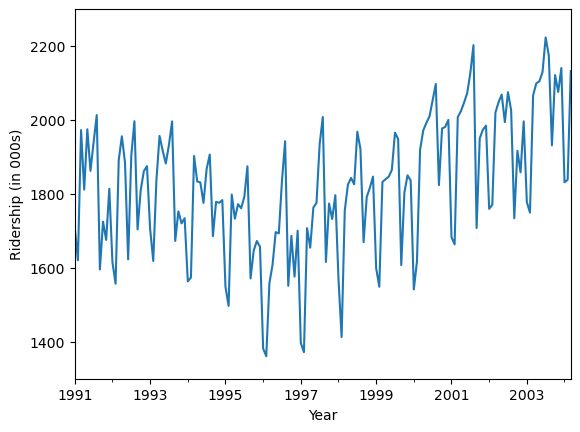

In [33]:
# Pandas Version
import pandas as pd
import matplotlib.pylab as plt
ridership_ts.plot(ylim=[1300, 2300], legend=False)
plt.xlabel('Year'); 
plt.ylabel('Ridership (in 000s)')

Text(0, 0.5, 'Ridership (in 000s)')

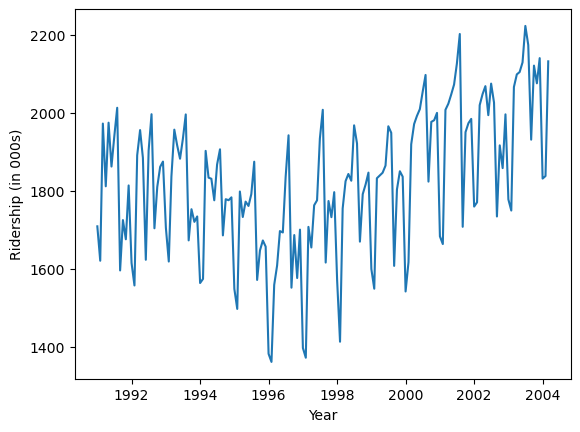

In [29]:
# matplotlib Version
import matplotlib.pylab as plt
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year'); plt.ylabel('Ridership (in 000s)')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

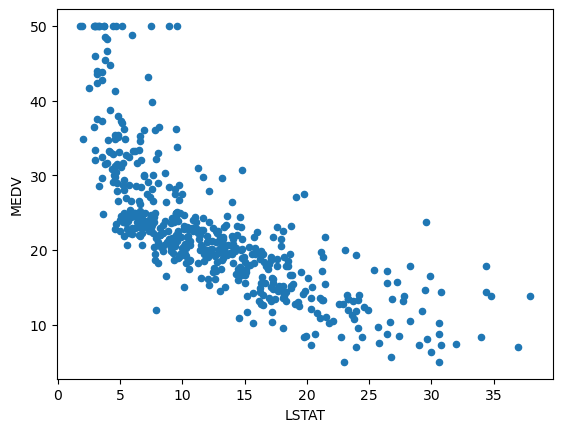

In [34]:
# Pandas Version
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

Text(0, 0.5, 'MEDV')

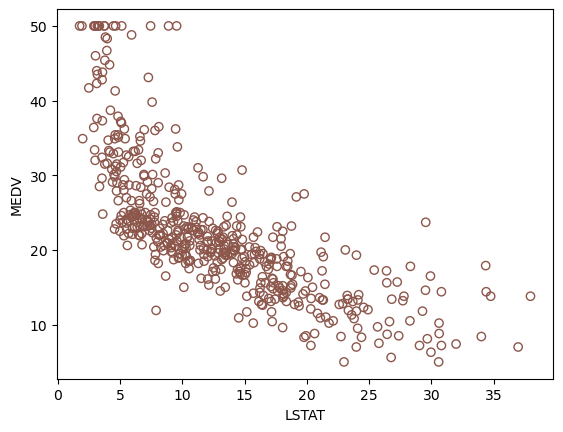

In [38]:
# matplotlib Version
# Set the color of the points in the scatterplot and draw as open circles
plt.scatter(housing_df.LSTAT, housing_df.MEDV, color='C5', facecolor='none')
plt.xlabel('LSTAT'); plt.ylabel('MEDV')

Text(0, 0.5, 'Avg. MEDV')

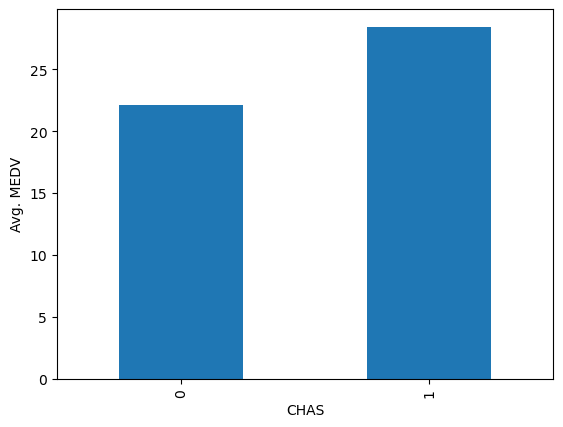

In [39]:
# Pandas Version
# compute mean MEDV per CHAR = (0, 1)
ax = housing_df.groupby('CHAS').mean().MEDV
fig = ax.plot(kind='bar')
fig.set_ylabel('Avg. MEDV')

Text(0, 0.5, 'Avg. MEDV')

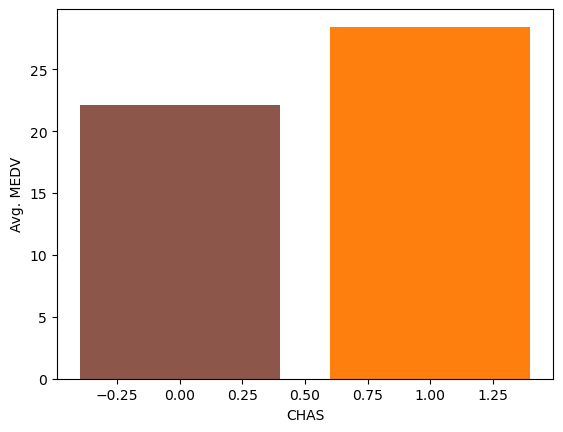

In [41]:
# matplotlib Version
# compute mean MEDV per CHAR = (0, 1)
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')

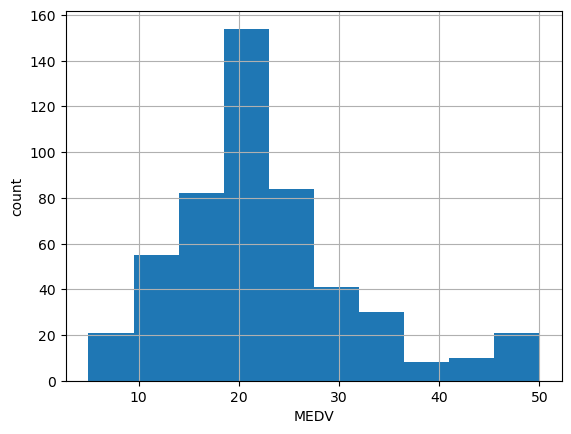

In [42]:
# Pandas Version
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV'); ax.set_ylabel('count');

Text(0.5, 0.98, '')

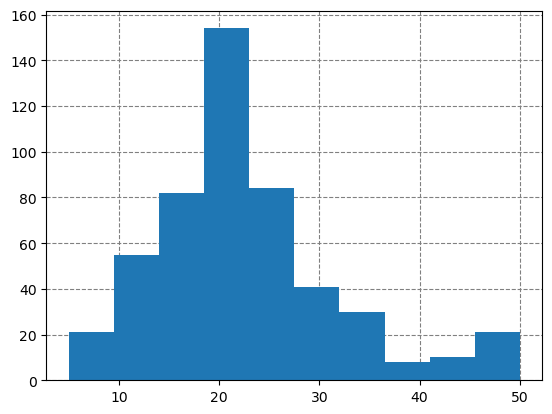

In [44]:
# matplotlib Version
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
ax.set_axisbelow(True) 
#Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
plt.suptitle('') 
# Suppress the titlesplt.title('')

Text(0.5, 1.0, '')

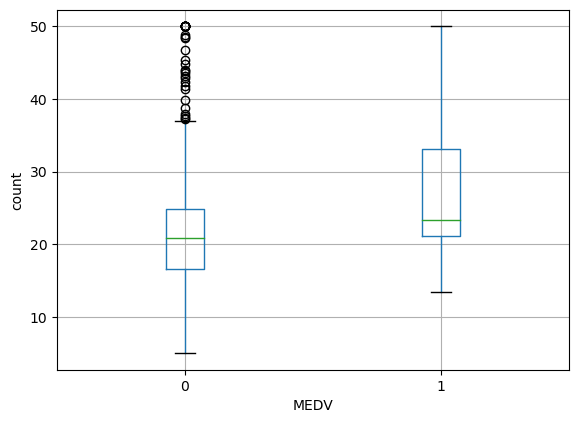

In [45]:
# Pandas Version
# boxplot of MEDV for different values of CHAS
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_xlabel('MEDV'); ax.set_ylabel('count')
plt.suptitle('') # Suppress the titles
plt.title('')

Text(0.5, 0.98, '')

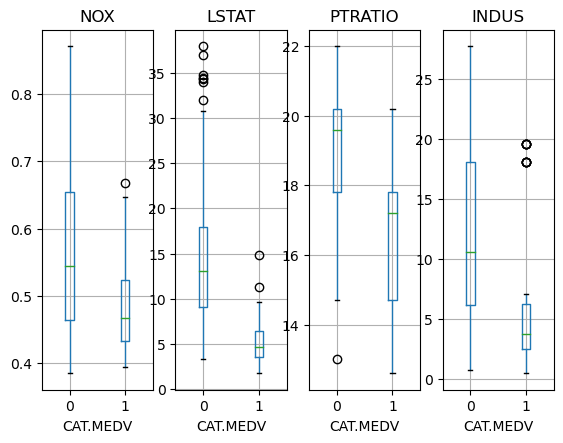

In [47]:
fig, axes = plt.subplots(nrows = 1, ncols = 4)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:ax.set_xlabel('CAT.MEDV')
plt.suptitle('') 
    # Suppress the overall titleplt.tight_layout() 
    #Increase the separation between the plots

<Axes: >

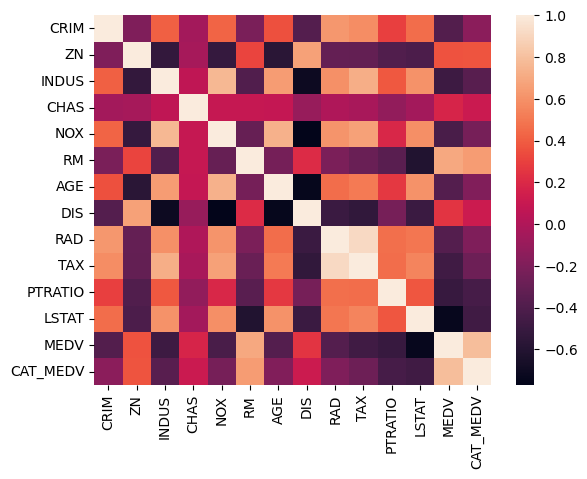

In [48]:
# Using seaborn
# Simple heatmap of correlations (without values)
import seaborn as sns
corr = housing_df.corr()
sns.heatmap(corr)

<Axes: >

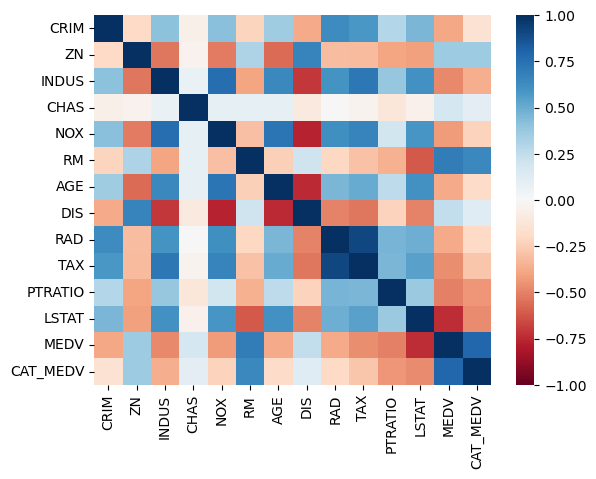

In [49]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1,vmax=1, cmap="RdBu")

<Axes: >

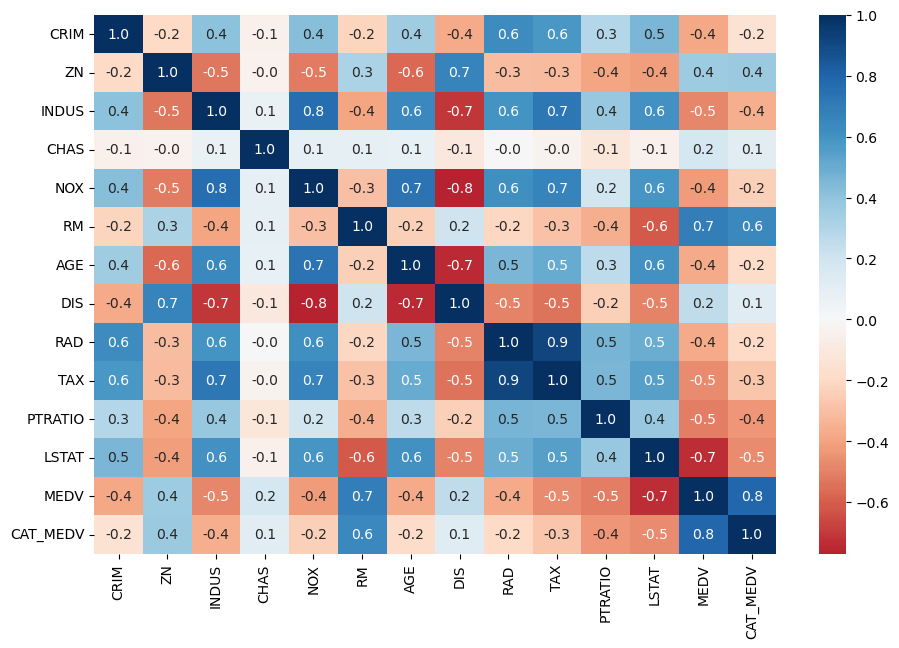

In [50]:
# Include information about values (example demonstrates how to control the sizeof the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

<Axes: xlabel='LSTAT', ylabel='NOX'>

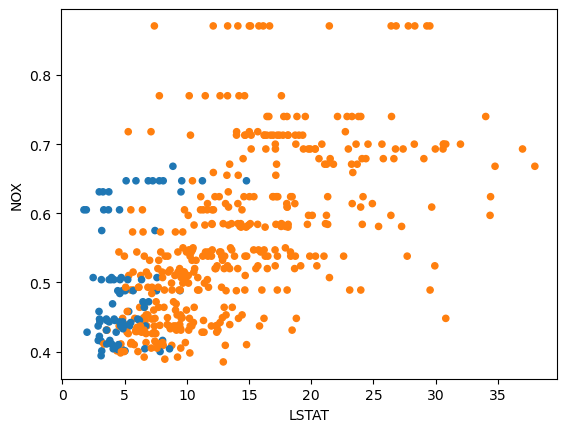

In [51]:
# Adding Variables
# Color the points by the value of CAT_MEDV
housing_df.plot.scatter(x='LSTAT', y='NOX', c=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])

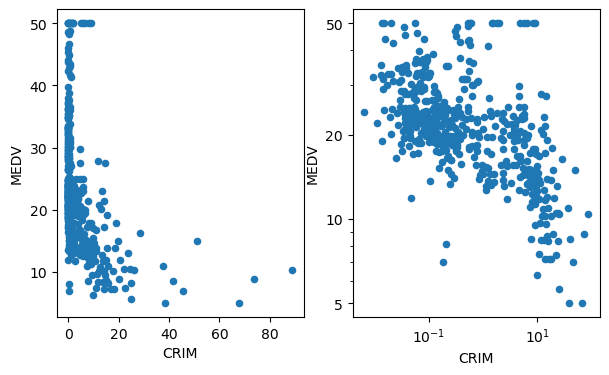

In [53]:
## scatter plot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
# regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])
# log scale
ax = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.show()